 * Student name: Charles Ondieki Otwori
 * Student pace: Part-time
 * Scheduled project review date/time: March , 2025
 * Instructor name:
 * Github link 

# Predicting HIV Risk and Identifying Key Infection Drivers among Adolescent Girls and Young Women in Kenya (2018–2022)
## Business Understanding 
### Project Value: 
This project provides critical insights to combat the HIV epidemic among adolescent girls by analyzing five years of program data. Adolescent girls and young women (AGYW) face disproportionately high HIV risk  in sub-Saharan Africa, HIV prevalence in young women is over three times higher than in their male peers​ unaids.org. By understanding how HIV incidence has changed from 2018 to 2022 and what factors drive new infections, stakeholders can sharpen their strategies to protect this vulnerable group. The analysis will ensure resources (e.g. prevention programs, funding) are directed to where they have the greatest impact, ultimately moving closer to the goal of an AIDS-free generation of girls.

### Real-World Problem: 
The  Adolescent girls and young women(AGYW) HIV prevention program was launched to reduce new HIV infections in AGYW aged 15 to 25 years  who significantly account for new HIV cases. Globally, women and girls comprised 44% of new HIV infections in 2023 unaids.org .This project addresses the  high HIV incidence in adolescent girls by identifying why these infections occur (key risk factors) and who is most at risk (through predictive modeling). Solving this problem means fewer new HIV cases, which is essential for achieving epidemic control targets.

import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [214]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import summarytools as st

In [215]:
AGYW_prev_data =pd.read_csv("\Capstone project\dreams_raw_dataset\dreams_raw_dataset.csv")
AGYW_prev_data.head(10)

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,9/16/2004,2/22/2020,Nairobi,Mother,NaN,58.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,NaN,NaN
1,8/2/2004,12/18/2019,Nairobi,Father,NaN,43.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
2,10/20/2005,3/7/2020,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
3,1/18/2006,3/3/2020,Nairobi,Mother,NaN,45.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
4,3/22/2004,12/18/2019,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
5,6/30/2003,5/12/2020,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
6,1/23/2005,5/11/2020,Nairobi,Mother,NaN,44.0,Don't Know,Yes,No,No,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
7,3/10/2005,5/15/2020,Nairobi,Mother,NaN,43.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
8,9/1/2004,5/14/2020,Nairobi,Mother,NaN,39.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
9,4/18/2003,3/2/2020,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN


Exploring the first 10 rows of the data set 


In [216]:
AGYW_prev_data.tail(10)

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
455797,1/27/1998,1/10/2021,Kiambu,Father,NaN,56.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),1/10/2021,Negative,1,1,1,0,0,24.0,NaN
455798,6/9/1998,1/16/2021,Kiambu,Mother,NaN,60.0,No,Yes,No,Yes,...,HTS - HTS (Client),1/16/2021,Negative,1,1,0,1,0,24.0,NaN
455799,9/27/2005,1/20/2021,Kiambu,Mother,NaN,48.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),1/20/2021,Negative,1,1,1,1,0,17.0,NaN
455800,7/23/1997,2/3/2021,Kiambu,Father,NaN,56.0,Yes,No,No,Yes,...,HTS - HTS (Client),2/16/2022,Negative,1,1,1,1,0,25.0,NaN
455801,12/21/1998,2/8/2021,Kiambu,Grandparents,NaN,90.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),3/26/2022,Negative,1,1,1,0,0,23.0,NaN
455802,3/15/2002,3/11/2021,Kiambu,Sibling,NaN,19.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),3/11/2021,Negative,1,1,1,0,0,21.0,NaN
455803,12/13/1999,4/13/2021,Kiambu,Husband/Partner,NaN,21.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/22/2022,Negative,1,1,1,0,0,22.0,NaN
455804,1/5/2007,4/21/2021,Kiambu,Grandparents,NaN,54.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),3/18/2022,Negative,1,1,1,0,0,16.0,NaN
455805,10/12/1997,12/2/2020,Kiambu,Grandparents,NaN,71.0,Don't Know,No,No,No,...,HTS - HTS (Client),12/2/2020,Negative,1,1,1,0,0,25.0,NaN
455806,1/15/1997,12/8/2020,Kiambu,NaN,NaN,NaN,NaN,NaN,No,No,...,HTS - HTS (Client),1/12/2022,Negative,1,1,1,1,0,25.0,NaN


Exploring the last 10 rows of the dataset 

In [217]:
AGYW_prev_data.shape

(455807, 42)

The dataset has 455807 rows and 42 columns 

In [218]:
AGYW_prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455807 entries, 0 to 455806
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date_of_birth                      455807 non-null  object 
 1   date_of_enrollment                 455806 non-null  object 
 2   county                             446551 non-null  object 
 3   head_of_household                  446192 non-null  object 
 4   head_of_household_other            5960 non-null    object 
 5   age_of_household_head              434789 non-null  float64
 6   father_alive                       442399 non-null  object 
 7   mother_alive                       442820 non-null  object 
 8   are_both_parents_alive             455807 non-null  object 
 9   is_one_parent_alive                455807 non-null  object 
 10  parents_alive_status               390403 non-null  object 
 11  no_of_people_in_household          4486

Checking the data types,number of varibles per feature, and memory usage

In [219]:
st.dfSummary(AGYW_prev_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,date_of_birth[object],1. 1/1/20002. 1/1/20023. 1/1/19984. 1/1/20015. 1/1/19996. 1/1/19967. 1/1/19978. 1/1/19949. 1/1/200310. 1/1/199511. other,"1,011 (0.2%)993 (0.2%)904 (0.2%)883 (0.2%)875 (0.2%)794 (0.2%)756 (0.2%)614 (0.1%)551 (0.1%)509 (0.1%)447,917 (98.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaElEQVR4nO3cQWoUYRRG0VehiWbSTQhkCbqHLMLFuohehHsIITUwMZNyIIo41lvQnjPK8B9ceDTUl2XbtoHC1d4P4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MlfLsnxcluX93g/h8l3NzIeZebf3Q7h8zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbmamS8z823vh3D5Fv/FiIozSkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4oGbGRERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8g4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4omWVmbmbmeu+HcLHetm17mZk53N3dfToej7d7v4jLtK7r07Isn7dtezkcj8fbh4eHl9Pp9Lr3w7gsz8/P78/n8+3j4+P1zLwcZmZOp9Pr/f39153fxmW6+fmHHwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDjM/PgXZ+yFcnj+7Oqzr+nQ+n2/nt09B4G9Z1/VpZt5mfBbOv/frs3DrKjJ+IJARGxmxkREbGbGRERsZsZERGxmxkfkOCvhuJDOJMoEAAAAASUVORK5CYII="">",0(0.0%)
2,date_of_enrollment[object],1. 12/9/20202. 12/2/20203. 12/3/20204. 8/23/20175. 12/7/20206. 8/28/20177. 12/10/20208. 12/4/20209. 12/15/202010. 8/25/201711. other,"1,795 (0.4%)1,786 (0.4%)1,723 (0.4%)1,712 (0.4%)1,707 (0.4%)1,691 (0.4%)1,683 (0.4%)1,673 (0.4%)1,671 (0.4%)1,634 (0.4%)438,732 (96.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfUlEQVR4nO3cMWobUQBF0S8jTNyMEAItRovwYrMI7UYITREbN0oRpwhRAgH7DijnVCHVFJfR5PNfVtfrdUDhYekH4P8hNjJiIyM2MmIjIzYyYiMjNjJiI7MaYzyNMcb1en1Z+Fm4c+vdbvc8xhir1eqr4PhMD9M0badp2o4xHpd+GO6bbzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7Oe5/n8/ue3RZ+Eu2eDQGblv8yi4s1GxrqKjHUVGUcfZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IuBZOxuCFjDcbGYMXMgYvZBx9kBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXgh41o4GYMXMr7ZyPgZJWNdRca6ioxvNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZFwLJ2NdRcabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxlvNjIGL2QMXsg4+iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZGwQyFhXkfFmI2NdRca6ioyjDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZFwLJ2PwQsabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxnfbGT8jJKxriJjXUXGNxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjKuhZOxriLjzUbG4IWMwQsZRx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsi4Fk7G4IXMzzebK+F8pLdbv5Tr3W73/L5BgA8xz/P51oBqPU3T9nA4vGw2m9elHo77cblcvhyPx+3pdHocY/wa2xhjbDab1/1+/22Rp+MePd36S+dsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZNZj/LgWsvSDcB/+1tJ6nufz8Xjcjj9cC4F/9T6i+m1A5Vo4n+HmtXCDFzL+gUBGbGTERkZsZMRGRmxkxEZGbGTERuY7CLkQJ3942gEAAAAASUVORK5CYII="">",1(0.0%)
3,county[object],1. Nairobi2. Kisumu3. Homabay4. Migori5. Siaya6. Mombasa7. Kiambu8. nan,"100,411 (22.0%)82,909 (18.2%)79,954 (17.5%)69,846 (15.3%)60,411 (13.3%)31,890 (7.0%)21,130 (4.6%)9,256 (2.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADS0lEQVR4nO3dQWrbaACG4d/FlOnGJgRyGB9iDjuH8G1CiBaT0o1nMQ1kpk2b1NIrqJ5nl5W1ePmNhL54d7lcBhQ+rH0BbIfYyIiNjNjIiI2M2Mjsxhifxhg

In [220]:
# checking missing information 
AGYW_prev_data.isnull().sum()

date_of_birth                             0
date_of_enrollment                        1
county                                 9256
head_of_household                      9615
head_of_household_other              449847
age_of_household_head                 21018
father_alive                          13408
mother_alive                          12987
are_both_parents_alive                    0
is_one_parent_alive                       0
parents_alive_status                  65404
no_of_people_in_household              7200
no_of_females                          7332
no_of_males                            7682
no_of_adults                           7479
no_of_children                         7773
ever_missed_full_day_food_in_4wks      7167
no_of_days_missed_food_in_4wks       199044
currently_in_school                    4173
current_school_level                 200866
current_income_source                129564
ever_tested_for_hiv                       0
last_test_result                

In the data set the are various variables with significant missing values  e.g head_of_household_other, no_of_days_missed_food_in_4wks, current_school_level, current_incme_source,age_at_first sexual encounter, has_sexual_partner,age_of_last_partner,used_condom_with_last_partner, dreams_program, dreams_program_other, exit_reason_other

In [221]:
# Checking proportion of missing information as a percentage of total variables
AGYW_prev_data.isnull().mean()*100

date_of_birth                         0.000000
date_of_enrollment                    0.000219
county                                2.030684
head_of_household                     2.109445
head_of_household_other              98.692429
age_of_household_head                 4.611162
father_alive                          2.941596
mother_alive                          2.849232
are_both_parents_alive                0.000000
is_one_parent_alive                   0.000000
parents_alive_status                 14.349056
no_of_people_in_household             1.579616
no_of_females                         1.608576
no_of_males                           1.685362
no_of_adults                          1.640826
no_of_children                        1.705327
ever_missed_full_day_food_in_4wks     1.572376
no_of_days_missed_food_in_4wks       43.668482
currently_in_school                   0.915519
current_school_level                 44.068213
current_income_source                28.425189
ever_tested_f

In the data set the are various variables with significant missing values  e.g head_of_household_other, no_of_days_missed_food_in_4wks, current_school_level, current_incme_source,age_at_first sexual encounter, has_sexual_partner,age_of_last_partner,used_condom_with_last_partner, dreams_program, dreams_program_other, exit_reason_other

In [222]:
#  identifying thecolumn names
AGYW_prev_data.columns

Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'head_of_household_other', 'age_of_household_head', 'father_alive',
       'mother_alive', 'are_both_parents_alive', 'is_one_parent_alive',
       'parents_alive_status', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'age_at_first_sexual_encounter', 'has_sexual_partner',
       'age_of_last_partner', 'used_condom_with_last_partner',
       'dreams_program', 'dreams_program_other', 'exit_status', 'exit_reason',
       'intervention_name', 'intervention_date', 'result', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_age', 'exit_reason_other'],
      dtype='object

In [223]:
# Calculate the total number of unique values for each column
unique_counts = AGYW_prev_data.nunique()
# Display the unique counts for each feature
print("Total number of unique values for each feature:")
print(unique_counts)

Total number of unique values for each feature:
date_of_birth                        7839
date_of_enrollment                   2604
county                                  7
head_of_household                       8
head_of_household_other               550
age_of_household_head                 204
father_alive                            3
mother_alive                            3
are_both_parents_alive                  2
is_one_parent_alive                     2
parents_alive_status                    2
no_of_people_in_household              64
no_of_females                          51
no_of_males                            36
no_of_adults                           29
no_of_children                         58
ever_missed_full_day_food_in_4wks       2
no_of_days_missed_food_in_4wks          3
currently_in_school                     2
current_school_level                    6
current_income_source                   7
ever_tested_for_hiv                     1
last_test_result            

In [224]:
# Looping through each columnto identify its unique values
for column in AGYW_prev_data.columns:
    unique_values = AGYW_prev_data[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("-" * 50)


Unique values in 'date_of_birth':
['9/16/2004' '8/2/2004' '10/20/2005' ... '5/25/2013' '5/26/1991'
 '9/25/1991']
--------------------------------------------------
Unique values in 'date_of_enrollment':
['2/22/2020' '12/18/2019' '3/7/2020' ... '1/21/2023' '10/1/2015'
 '7/31/2022']
--------------------------------------------------
Unique values in 'county':
['Nairobi' 'Kiambu' nan 'Siaya' 'Kisumu' 'Mombasa' 'Homabay' 'Migori']
--------------------------------------------------
Unique values in 'head_of_household':
['Mother' 'Father' 'Husband/Partner' 'Self' 'Other/Specify' 'Grandparents'
 'Sibling' 'Uncle/Aunt' nan]
--------------------------------------------------
Unique values in 'head_of_household_other':
[nan 'Friend' 'cousin' 'Sister' 'Godfather' 'Guardian' 'Gurdian' 'Brother'
 'guardian' 'Cousin' 'Caregiver' 'Care giver' 'Brother in law'
 'Brother inlaw' 'cousine' '39' 'Neighbour' 'A friend'
 'Husband to the sister' 'GUARDIAN' 'GURDIAN' 'WELL WISHER' 'STEP MOTHER'
 'CAREGIVER' '

In [225]:
# Looping through each column in the DataFrame to calculate the percentage distribution of unique values if theu are less than 30 
for column in AGYW_prev_data.columns:
    # Only process columns with 30 or fewer unique values
    if AGYW_prev_data[column].nunique(dropna=False) <= 30:
        print(f"Frequency distribution for '{column}':")
        
        # Calculate frequency counts including missing values
        freq = AGYW_prev_data[column].value_counts(dropna=False)
        
        # Calculate percentage distribution (normalize the counts)
        perc = AGYW_prev_data[column].value_counts(normalize=True, dropna=False) * 100
        
        # Combine counts and percentages into a DataFrame
        distribution = pd.DataFrame({'Count': freq, 'Percentage': perc})
        
        # Display the distribution
        print(distribution)
        print("-" * 50)


Frequency distribution for 'county':
          Count  Percentage
county                     
Nairobi  100411   22.029280
Kisumu    82909   18.189497
Homabay   79954   17.541196
Migori    69846   15.323591
Siaya     60411   13.253636
Mombasa   31890    6.996382
Kiambu    21130    4.635734
NaN        9256    2.030684
--------------------------------------------------
Frequency distribution for 'head_of_household':
                    Count  Percentage
head_of_household                    
Father             173119   37.980768
Mother             127718   28.020193
Husband/Partner     65157   14.294866
Self                23893    5.241912
Uncle/Aunt          21498    4.716470
Grandparents        18091    3.969004
Sibling             11041    2.422297
NaN                  9615    2.109445
Other/Specify        5675    1.245045
--------------------------------------------------
Frequency distribution for 'father_alive':
               Count  Percentage
father_alive                    
Yes   

* The following columns will need to be cleaned 

#### Data cleaning 

In [226]:
# converting date columns to dateline 
date= ['date_of_birth', 'date_of_enrollment','intervention_date']
for col in date:
    AGYW_prev_data[col] = pd.to_datetime(AGYW_prev_data[col])

In [227]:
AGYW_prev_data[['date_of_birth','date_of_enrollment','intervention_date']].head()

,date_of_birth,date_of_enrollment,intervention_date
0,2004-09-16,2020-02-22,2020-08-08
1,2004-08-02,2019-12-18,2020-04-27
2,2005-10-20,2020-03-07,2020-08-12
3,2006-01-18,2020-03-03,2020-08-12
4,2004-03-22,2019-12-18,2020-04-27


In [228]:
# Checking duplicate rows
AGYW_prev_data.duplicated().sum()

90

In [229]:
# Removing duplicate rows
AGYW_prev_data = AGYW_prev_data.drop_duplicates()

In [230]:
 #Stripping leading and trailing whitespace
obj_cols = AGYW_prev_data.select_dtypes(include=['object']).columns
for col in obj_cols:
    AGYW_prev_data[col] = AGYW_prev_data[col].str.strip()

In [231]:
# Convertting columns expected to be numeric from object to numeric type
num_cols = [
    'age_of_household_head', 'no_of_people_in_household', 'no_of_females', 'no_of_males', 'no_of_adults', 'no_of_children', 'no_of_days_missed_food_in_4wks', 
    'age_at_first_sexual_encounter', 'age_of_last_partner', 'exit_age']
for col in num_cols:
    AGYW_prev_data[col] = pd.to_numeric(AGYW_prev_data[col], errors='coerce')

In [232]:
#Standardize categorical variables that have binary responses (e.g., Yes/No)
binary_cols = ['father_alive', 'mother_alive', 'ever_missed_full_day_food_in_4wks', 'currently_in_school', 'ever_tested_for_hiv', 'ever_had_sex', 'has_sexual_partner', 
               'used_condom_with_last_partner']
for col in binary_cols:
    if col in AGYW_prev_data.columns:
        # Convert to lower case for consistency
        AGYW_prev_data[col] = AGYW_prev_data[col].str.lower()
        # Replace common variations with standardized 'yes' or 'no'
        AGYW_prev_data[col] = AGYW_prev_data[col].replace({'yes': 'yes', 'no': 'no', 'y': 'yes', 'n': 'no'})

# print the first few rows 
AGYW_prev_data[['father_alive', 'mother_alive', 'ever_missed_full_day_food_in_4wks', 'currently_in_school', 'ever_tested_for_hiv', 'ever_had_sex', 'has_sexual_partner', 
               'used_condom_with_last_partner']].head()
        



,father_alive,mother_alive,ever_missed_full_day_food_in_4wks,currently_in_school,ever_tested_for_hiv,ever_had_sex,has_sexual_partner,used_condom_with_last_partner
0,yes,yes,no,yes,yes,no,NaN,NaN
1,yes,yes,no,yes,yes,no,NaN,NaN
2,no,yes,yes,yes,yes,no,NaN,NaN
3,no,yes,no,yes,yes,no,NaN,NaN
4,yes,yes,no,yes,yes,no,NaN,NaN


In [233]:
# Creating a new column 'year' by extracting the year from 'date_of_enrollment'
AGYW_prev_data['year'] = AGYW_prev_data['date_of_enrollment'].dt.year

# Displaying the first few rows to verify the new column
AGYW_prev_data[['date_of_enrollment', 'year']].head()

,date_of_enrollment,year
0,2020-02-22,2020.0
1,2019-12-18,2019.0
2,2020-03-07,2020.0
3,2020-03-03,2020.0
4,2019-12-18,2019.0


In [234]:
# Defining a function to calculate age at enrollment using the birth and enrollment dates
def calculate_age(row):
    dob = row['date_of_birth']
    doe = row['date_of_enrollment']
    # Return NaN if either date is missing
    if pd.isnull(dob) or pd.isnull(doe):
        return np.nan
    # Compute the basic difference in years
    age = doe.year - dob.year
    # Adjust if the birthday has not yet occurred in the enrollment year
    if (doe.month, doe.day) < (dob.month, dob.day):
        age -= 1
    return age

# Apply the function to create a new column 'age_at_enrollment'
AGYW_prev_data['age_at_enrollment'] = AGYW_prev_data.apply(calculate_age, axis=1)

# Calculate the mean age (ignoring missing values)
mean_age = AGYW_prev_data['age_at_enrollment'].mean()

# Impute missing ages with the mean age
AGYW_prev_data['age_at_enrollment'].fillna(mean_age, inplace=True)

# Display the first few rows to verify the result
AGYW_prev_data[['date_of_birth', 'date_of_enrollment', 'age_at_enrollment']].head()

,date_of_birth,date_of_enrollment,age_at_enrollment
0,2004-09-16,2020-02-22,15.0
1,2004-08-02,2019-12-18,15.0
2,2005-10-20,2020-03-07,14.0
3,2006-01-18,2020-03-03,14.0
4,2004-03-22,2019-12-18,15.0


In [235]:
# Creating age groups by defining bins and labels for the age groups
bins = [5, 10, 15, 20, 25, float('inf')]
labels = ["5-9", "10-14", "15-19", "20-24", "Over 24"]

# Create the new column 'age_group' based on 'age_at_enrollment'
AGYW_prev_data['age_group'] = pd.cut(AGYW_prev_data['age_at_enrollment'], bins=bins, right=False, labels=labels)

# Display the distribution of the new age groups
age_group_distribution = AGYW_prev_data['age_group'].value_counts().sort_index()
age_group_distribution

age_group
5-9          2470
10-14       63708
15-19      228888
20-24      160566
Over 24        85
Name: count, dtype: int64

In [236]:
# dropping columns not useful in analysis 

In [237]:
# Imputing missing values

### Univariate Analysis 

In [238]:
#1. Numerical Summary Statistics
AGYW_prev_data.describe().T

,count,mean,min,25%,50%,75%,max,std
date_of_birth,455717,2001-03-11 00:00:43.037235968,1990-06-01 00:00:00,1998-07-01 00:00:00,2001-04-01 00:00:00,2003-11-29 00:00:00,2013-12-05 00:00:00,NaN
date_of_enrollment,455716,2019-08-12 23:29:39.350297344,2015-10-01 00:00:00,2017-09-15 00:00:00,2020-01-24 00:00:00,2021-01-20 00:00:00,2023-11-28 00:00:00,NaN
age_of_household_head,434709.0,2074.966688,-48.0,33.0,42.0,50.0,727284575.0,1106863.216657
no_of_people_in_household,448526.0,5.774374,0.0,4.0,6.0,7.0,356.0,3.837436
no_of_females,448394.0,3.330818,0.0,2.0,3.0,4.0,216.0,2.41311
no_of_males,448044.0,2.443644,0.0,1.0,2.0,3.0,140.0,1.911722
no_of_adults,448247.0,2.49224,0.0,2.0,2.0,3.0,77.0,1.295507
no_of_children,447953.0,3.282972,0.0,2.0,3.0,4.0,328.0,3.433387
no_of_days_missed_food_in_4wks,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_at_first_sexual_encounter,226249.0,16.781352,0.0,15.0,17.0,18.0,4118.0,20.991707


In [239]:
#2. Frequency counts for categorical variables
AGYW_prev_data['age_group'].value_counts()

age_group
15-19      228888
20-24      160566
10-14       63708
5-9          2470
Over 24        85
Name: count, dtype: int64

In [240]:
#3. Frequency counts for 'year'
AGYW_prev_data['year'].value_counts()

year
2020.0    111625
2021.0     73742
2017.0     72907
2016.0     64205
2018.0     49906
2022.0     48483
2019.0     32898
2023.0      1810
2015.0       140
Name: count, dtype: int64

In [241]:
# Set a consistent style for the plots
sns.set(style="whitegrid")

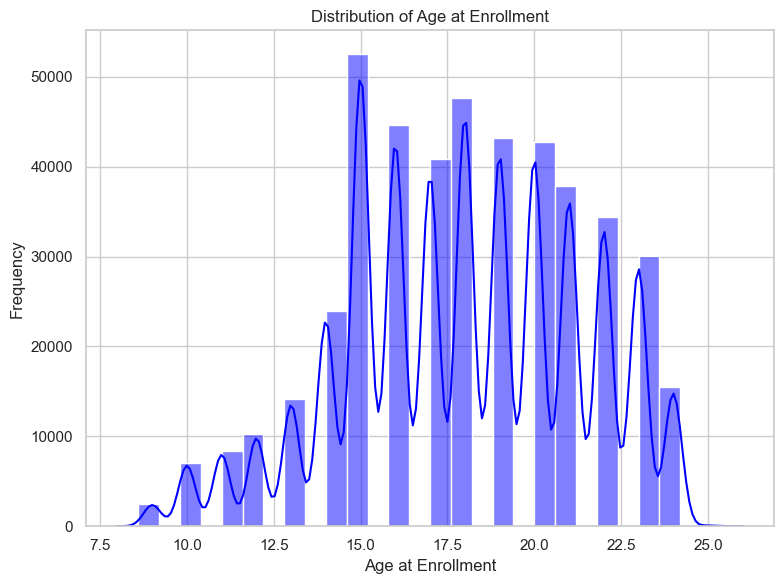

In [242]:
# 4. Histogram for 'age_at_enrollment'
plt.figure(figsize=(8, 6))
sns.histplot(AGYW_prev_data['age_at_enrollment'], bins=30, color='blue', kde= True)
plt.xlabel("Age at Enrollment")
plt.ylabel("Frequency")
plt.title("Distribution of Age at Enrollment")
plt.tight_layout()
plt.show()

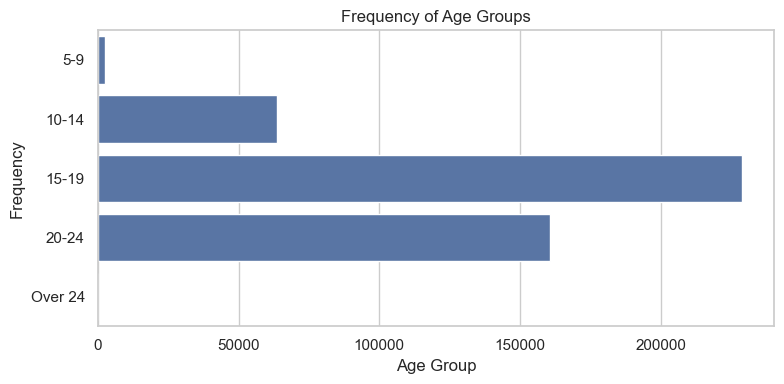

In [243]:
# 5. Bar Chart for Age Groups
age_group_counts = AGYW_prev_data['age_group'].value_counts().sort_index().reset_index()
age_group_counts.columns = ['age_group', 'Frequency']
plt.figure(figsize=(8, 4))

sns.barplot(data= age_group_counts, x='Frequency', y='age_group', orient='h')
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("Frequency of Age Groups")
plt.tight_layout()
plt.show()

C:\Users\ondie\AppData\Local\Temp\ipykernel_18972\3283110118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= AGYW_prev_data, x ='result', palette='viridis')


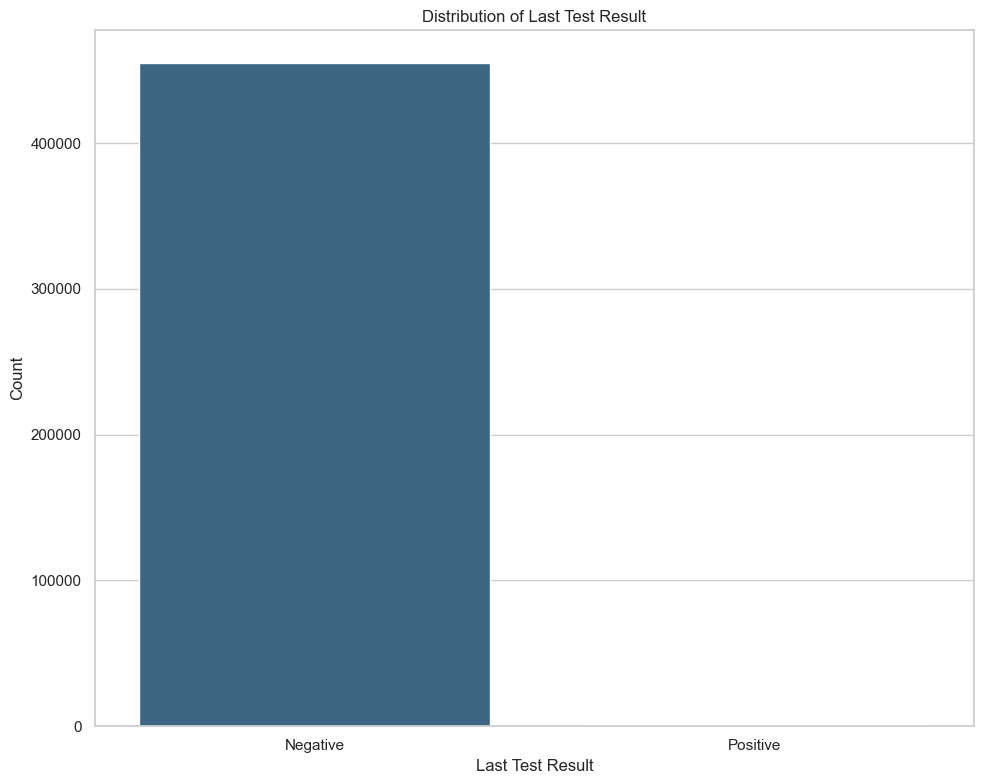

In [244]:
# Distribution of the target variable 'last_test_result'
plt.figure(figsize=(10, 8))
sns.countplot(data= AGYW_prev_data, x ='result', palette='viridis')
plt.title("Distribution of Last Test Result")
plt.xlabel("Last Test Result")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

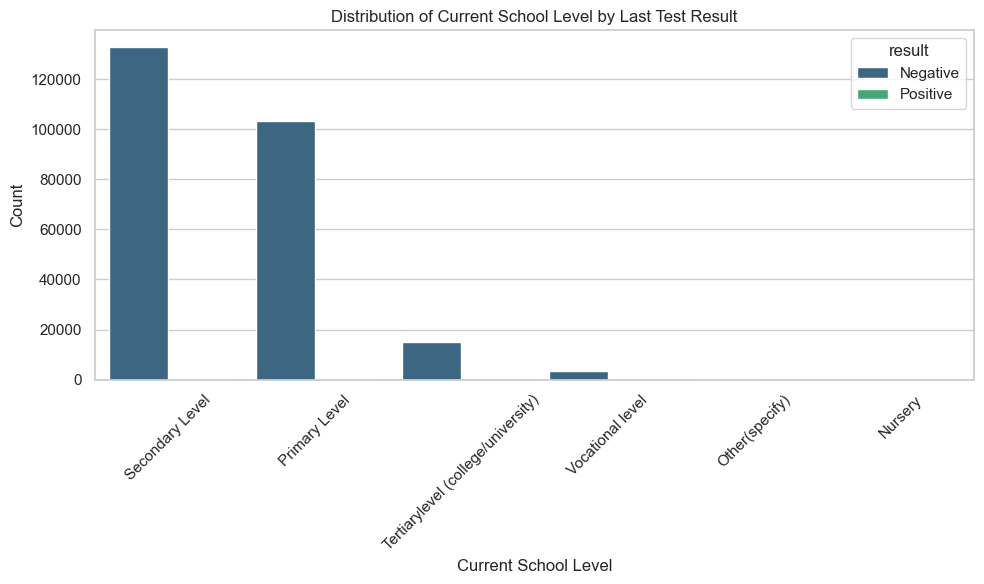

In [245]:
#Countplot for another categorical variable (e.g., current_school_level) split by Last Test Result
if 'current_school_level' in AGYW_prev_data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data= AGYW_prev_data, x='current_school_level', hue='result', palette='viridis')
    plt.title("Distribution of Current School Level by Last Test Result")
    plt.xlabel("Current School Level")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Bivariate analysis

C:\Users\ondie\AppData\Local\Temp\ipykernel_18972\25237465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=AGYW_prev_data, x='result', y='age_at_enrollment', palette='Set2')


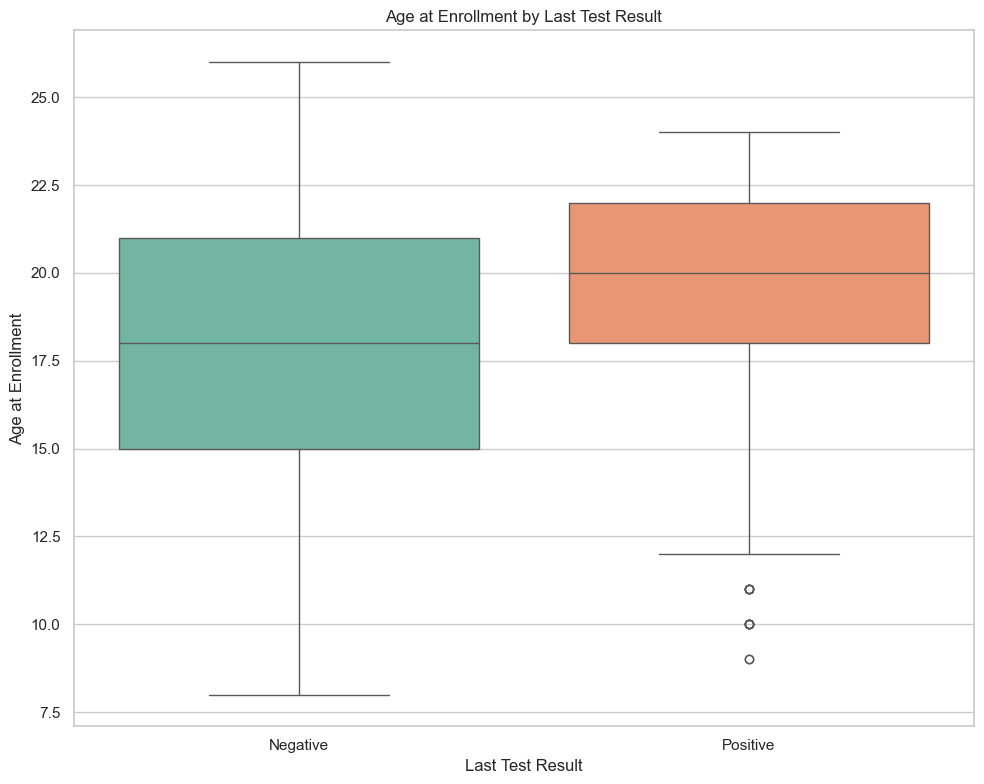

In [246]:
#Boxplot: Age at Enrollment by Last Test Result
plt.figure(figsize=(10, 8))
sns.boxplot(data=AGYW_prev_data, x='result', y='age_at_enrollment', palette='Set2')
plt.title("Age at Enrollment by Last Test Result")
plt.xlabel("Last Test Result")
plt.ylabel("Age at Enrollment")
plt.tight_layout()
plt.show()

C:\Users\ondie\AppData\Local\Temp\ipykernel_18972\4168219764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=AGYW_prev_data, x='result', y='county', palette='Set2')


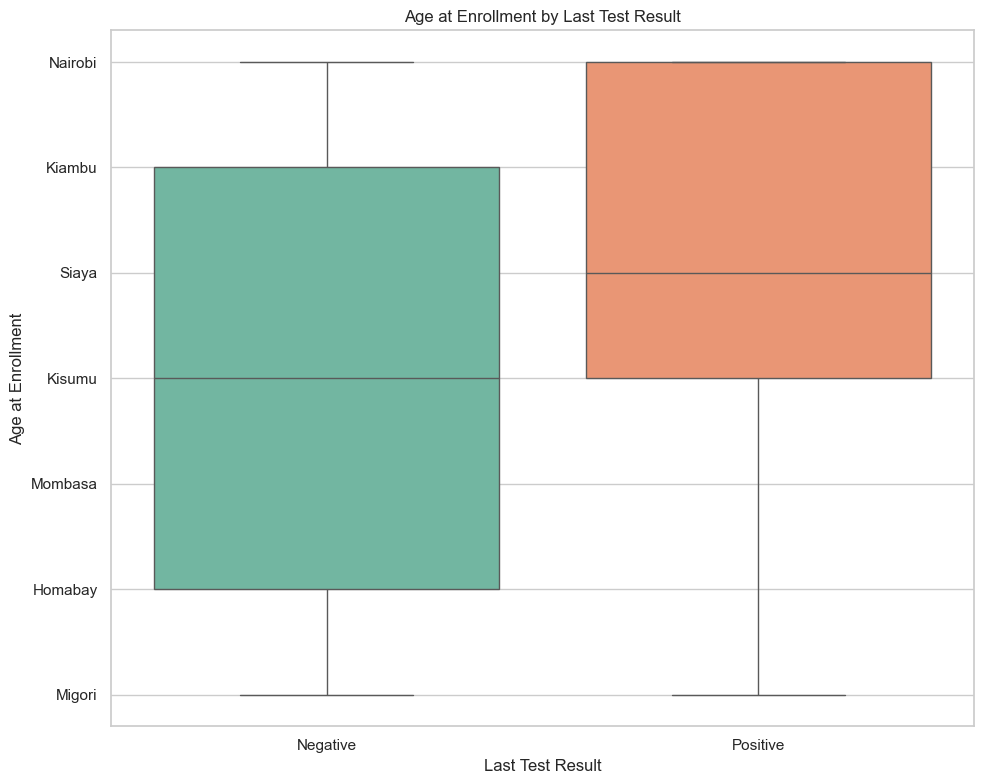

In [247]:
#Boxplot: Age at Enrollment by Last Test Result
plt.figure(figsize=(10, 8))
sns.boxplot(data=AGYW_prev_data, x='result', y='county', palette='Set2')
plt.title("Age at Enrollment by Last Test Result")
plt.xlabel("Last Test Result")
plt.ylabel("Age at Enrollment")
plt.tight_layout()
plt.show()

Incidence of HIV status by counties

County Incidence Data:
    county   total  positive  percentage
0  Homabay   79934        88    0.110091
1   Kiambu   21127        50    0.236664
2   Kisumu   82893        95    0.114606
3   Migori   69829       106    0.151799
4  Mombasa   31879        28    0.087832
5  Nairobi  100397       333    0.331683
6    Siaya   60402       316    0.523161


C:\Users\ondie\AppData\Local\Temp\ipykernel_18972\4046992925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=county_incidence, x='county', y='percentage', palette='viridis')


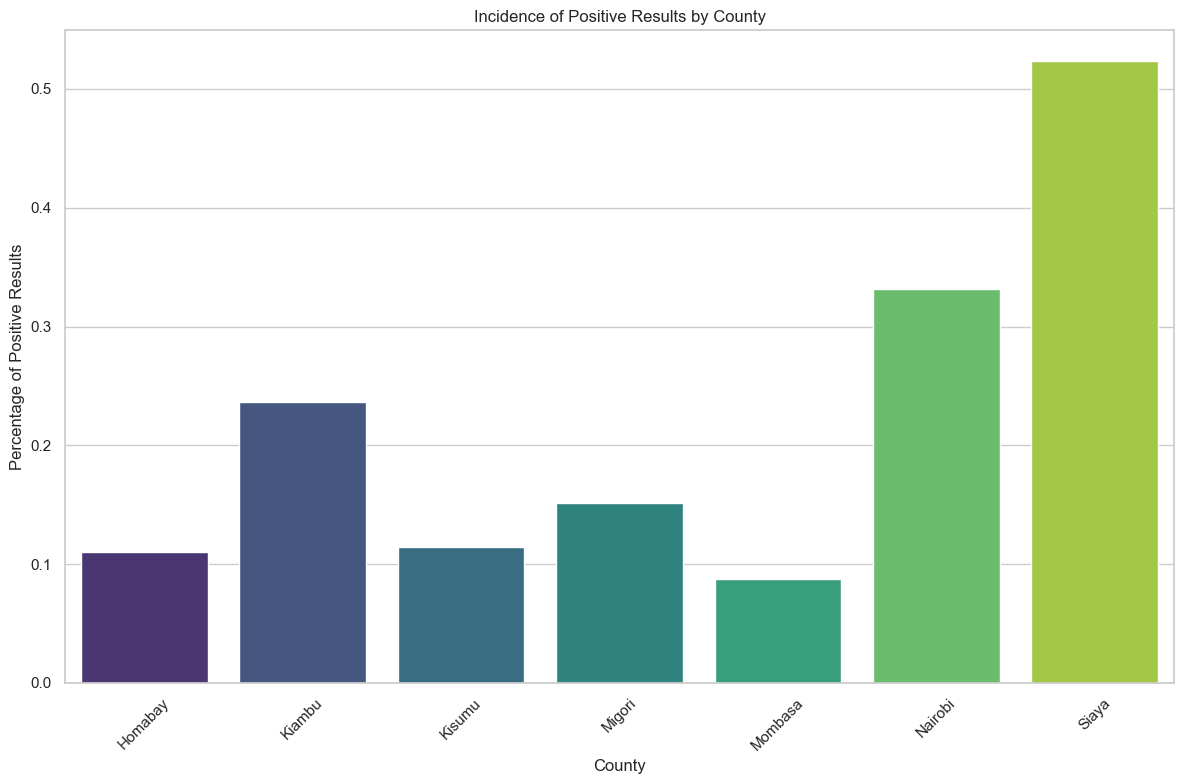

In [248]:
# Total count per county
county_total = AGYW_prev_data.groupby('county').size().reset_index(name='total')

# Count of positive results per county (assuming the positive value is "Positive")
county_positive = AGYW_prev_data[AGYW_prev_data['result'] == 'Positive'].groupby('county').size().reset_index(name='positive')

# Merge the totals with the positive counts
county_incidence = pd.merge(county_total, county_positive, on='county', how='left')
county_incidence['positive'].fillna(0, inplace=True)  # Replace missing positives with 0
county_incidence['percentage'] = (county_incidence['positive'] / county_incidence['total']) * 100

# Display the computed incidence data (optional)
print("County Incidence Data:")
print(county_incidence)

# Plot the incidence percentage for each county
plt.figure(figsize=(12, 8))
sns.barplot(data=county_incidence, x='county', y='percentage', palette='viridis')
plt.title("Incidence of Positive Results by County")
plt.xlabel("County")
plt.ylabel("Percentage of Positive Results")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Age Group Incidence Data:
  age_group   total  positive  percentage
0       5-9    2470         2    0.080972
1     10-14   63708        55    0.086331
2     15-19  228888       362    0.158156
3     20-24  160566       600    0.373678
4   Over 24      85         0    0.000000


C:\Users\ondie\AppData\Local\Temp\ipykernel_18972\2291828455.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_incidence, x='age_group', y='percentage', palette='magma')


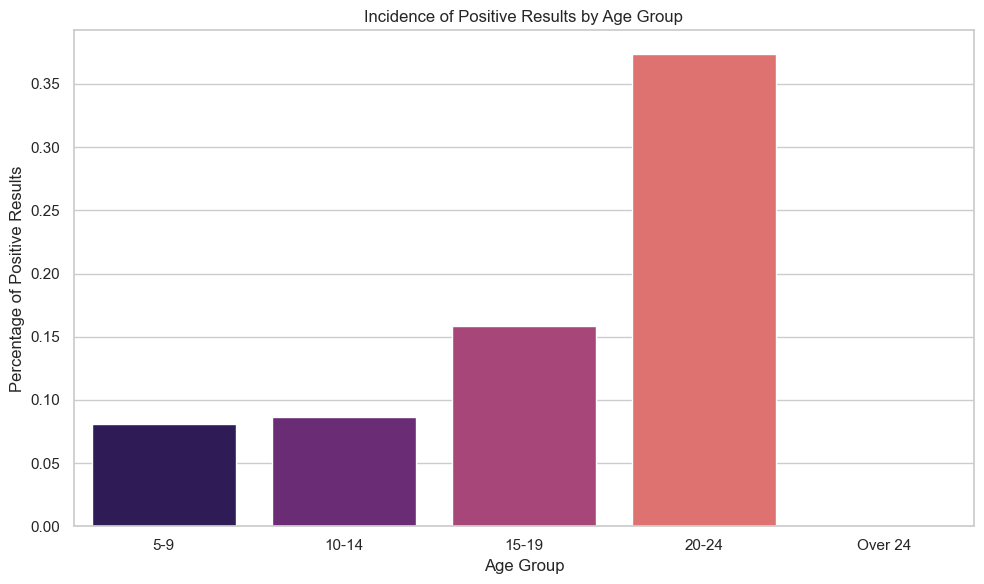

In [249]:
# Total count per age group
age_total = AGYW_prev_data.groupby('age_group').size().reset_index(name='total')

# Count of positive results per age group
age_positive_results = AGYW_prev_data[AGYW_prev_data['result'] == 'Positive'].groupby('age_group').size().reset_index(name='positive')

# Merge the totals with the positive counts
age_incidence = pd.merge(age_total, age_positive_results, on='age_group', how='left')
age_incidence['positive'].fillna(0, inplace=True)
age_incidence['percentage'] = (age_incidence['positive'] / age_incidence['total']) * 100

# Display the computed incidence data (optional)
print("Age Group Incidence Data:")
print(age_incidence)

# Plot the incidence percentage for each age group
plt.figure(figsize=(10, 6))
sns.barplot(data=age_incidence, x='age_group', y='percentage', palette='magma')
plt.title("Incidence of Positive Results by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage of Positive Results")
plt.tight_layout()
plt.show()

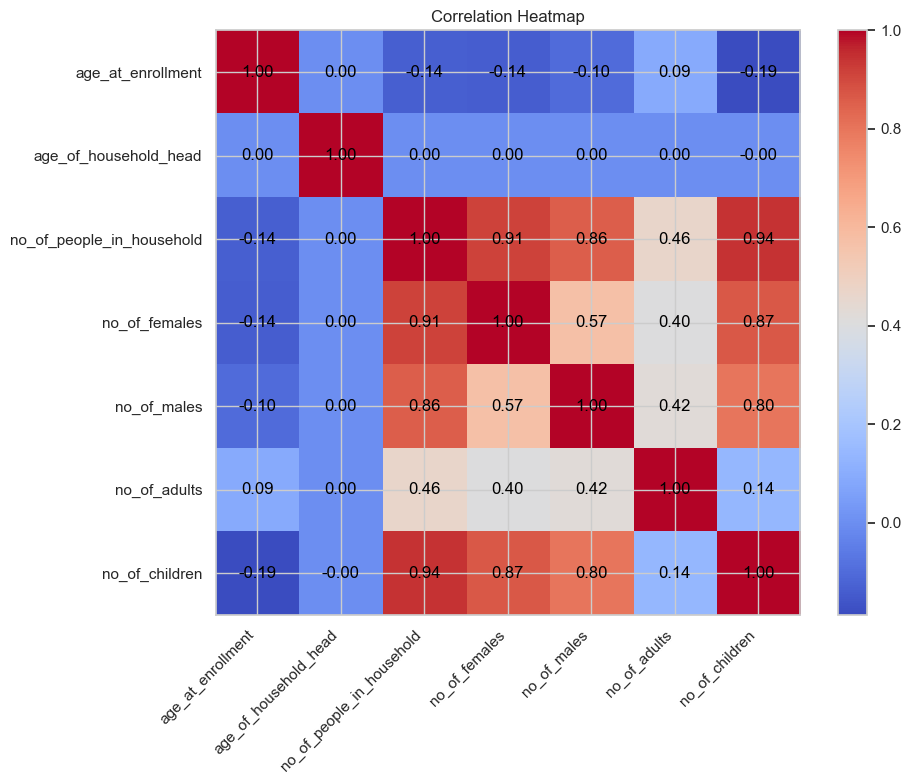

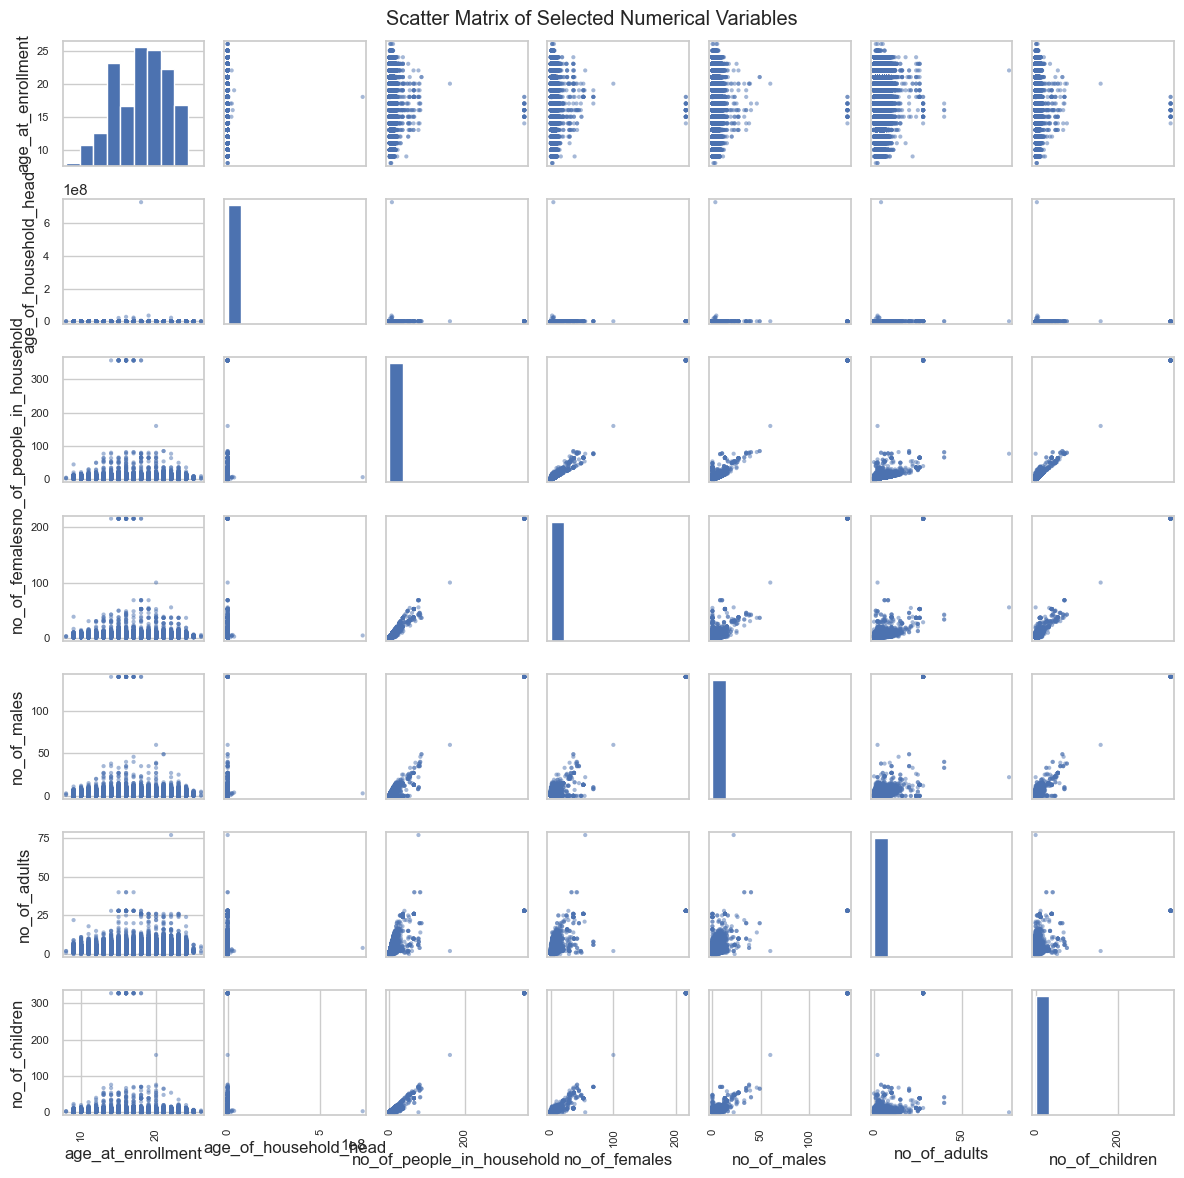

In [250]:
# 1. Correlation Heatmap for Selected Numerical Variables
num_vars = ['age_at_enrollment', 'age_of_household_head', 'no_of_people_in_household', 
            'no_of_females', 'no_of_males', 'no_of_adults', 'no_of_children']

corr_matrix = AGYW_prev_data[num_vars].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(num_vars)), num_vars, rotation=45, ha="right")


plt.yticks(range(len(num_vars)), num_vars)
plt.title("Correlation Heatmap")
# Annotate the correlation coefficients on the heatmap
for i in range(len(num_vars)):
    for j in range(len(num_vars)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")
plt.tight_layout()
plt.show()

# 2. Scatter Matrix (Pair Plot) for Selected Numerical Variables
pd.plotting.scatter_matrix(AGYW_prev_data[num_vars], figsize=(12, 12), diagonal='hist')
plt.suptitle("Scatter Matrix of Selected Numerical Variables")
plt.tight_layout()
plt.show()


### Cleaned dataframe  preprocessing 